# Anthony Le
"On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."  

https://youtu.be/adjCNk2vfXg "Final Project")

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import svm
from sklearn.neural_network import MLPClassifier


#ensemble classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm

from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_auc_score, auc

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Data Understanding and Data Cleaning

The goal is to use the dataset to help predict who will renew there ticket and who will not.
My hypothesis is that people who are in backer club will more likely to renew and people who been a ticket holder for a long time.

In [22]:
df=pd.read_excel("data/train_test_dataset.xlsx")
df.head(10)

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94,4,NaN,0,1,NaN,,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,,,NaN,0,0,NaN,1,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67,2,NaN,0,1,0.0,,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62,4,,1,1,0.0,1,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89,4,,1,1,0.0,,65,194
5,611B52LL,1,0,0,1,0,0,15,2,0,77,0,,0,,0.0,,54,92
6,612W26VA,1,0,1,0,0,0,15,4,0,67,1,1,1,,NaN,,63,129
7,594Y59EZ,0,1,1,0,0,1,15,6,1,76,5,NaN,1,1,0.0,,50,483
8,610K33YD,1,1,0,0,0,1,25,4,1,,,NaN,,0,NaN,,51,168
9,716W84WL,1,0,1,1,0,0,15,3,1,54,3,,0,,NaN,,51,90


In [23]:
df.info()
# Checking for missing data and data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 19 columns):
FAKEID      9216 non-null object
Y2defect    9216 non-null int64
Y1G5        9216 non-null int64
Y1G4        9216 non-null int64
Y1G3        9216 non-null int64
Y1G2        9216 non-null int64
Y1G1        9216 non-null int64
Y1price     9216 non-null int64
YEARS       9216 non-null int64
BACKER      9216 non-null int64
AGE         9216 non-null object
INCOME      9216 non-null object
CHILD       4549 non-null object
GNDR        9216 non-null object
OWNHOME     9216 non-null object
SPORT       4273 non-null float64
COMP        9216 non-null object
PCTMARR     9216 non-null int64
HOMEVAL     9216 non-null int64
dtypes: float64(1), int64(11), object(7)
memory usage: 1.3+ MB


In [24]:
df = df.replace(r'\s+', np.nan, regex=True)
df.head(10)
# I replace all missing value to NaN

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94.0,4.0,NaN,0.0,1.0,NaN,NaN,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,NaN,NaN,NaN,0.0,0.0,NaN,1.0,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67.0,2.0,NaN,0.0,1.0,0.0,NaN,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62.0,4.0,NaN,1.0,1.0,0.0,1.0,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89.0,4.0,NaN,1.0,1.0,0.0,NaN,65,194
5,611B52LL,1,0,0,1,0,0,15,2,0,77.0,0.0,NaN,0.0,NaN,0.0,NaN,54,92
6,612W26VA,1,0,1,0,0,0,15,4,0,67.0,1.0,1.0,1.0,NaN,NaN,NaN,63,129
7,594Y59EZ,0,1,1,0,0,1,15,6,1,76.0,5.0,NaN,1.0,1.0,0.0,NaN,50,483
8,610K33YD,1,1,0,0,0,1,25,4,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,51,168
9,716W84WL,1,0,1,1,0,0,15,3,1,54.0,3.0,NaN,0.0,NaN,NaN,NaN,51,90


In [25]:
df.isnull().sum()

FAKEID         0
Y2defect       0
Y1G5           0
Y1G4           0
Y1G3           0
Y1G2           0
Y1G1           0
Y1price        0
YEARS          0
BACKER         0
AGE         1993
INCOME      1944
CHILD       8634
GNDR         498
OWNHOME     1999
SPORT       4943
COMP        8207
PCTMARR        0
HOMEVAL        0
dtype: int64

In [26]:
df = df.drop(['CHILD', 'COMP', 'SPORT'], axis=1)
df.head(10)
# I drop CHild, Comp, and Sport columns because there were to many missing value.
# I drop Own home because I feel it isn't that important.

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94.0,4.0,0.0,1.0,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,NaN,NaN,0.0,0.0,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67.0,2.0,0.0,1.0,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62.0,4.0,1.0,1.0,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89.0,4.0,1.0,1.0,65,194
5,611B52LL,1,0,0,1,0,0,15,2,0,77.0,0.0,0.0,NaN,54,92
6,612W26VA,1,0,1,0,0,0,15,4,0,67.0,1.0,1.0,NaN,63,129
7,594Y59EZ,0,1,1,0,0,1,15,6,1,76.0,5.0,1.0,1.0,50,483
8,610K33YD,1,1,0,0,0,1,25,4,1,NaN,NaN,NaN,0.0,51,168
9,716W84WL,1,0,1,1,0,0,15,3,1,54.0,3.0,0.0,NaN,51,90


In [27]:
df.isnull().sum()

FAKEID         0
Y2defect       0
Y1G5           0
Y1G4           0
Y1G3           0
Y1G2           0
Y1G1           0
Y1price        0
YEARS          0
BACKER         0
AGE         1993
INCOME      1944
GNDR         498
OWNHOME     1999
PCTMARR        0
HOMEVAL        0
dtype: int64

In [28]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4741 entries, 0 to 9214
Data columns (total 16 columns):
FAKEID      4741 non-null object
Y2defect    4741 non-null int64
Y1G5        4741 non-null int64
Y1G4        4741 non-null int64
Y1G3        4741 non-null int64
Y1G2        4741 non-null int64
Y1G1        4741 non-null int64
Y1price     4741 non-null int64
YEARS       4741 non-null int64
BACKER      4741 non-null int64
AGE         4741 non-null float64
INCOME      4741 non-null float64
GNDR        4741 non-null float64
OWNHOME     4741 non-null float64
PCTMARR     4741 non-null int64
HOMEVAL     4741 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 629.7+ KB


There was some data cleaning I need to do. I replace all blank to NaN and then drop Child, Comp, and Sport because too many information were missing from them. I then drop all the row that were missing value.

# Data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000013EAF588>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000015DF8BA8>]], dtype=object)

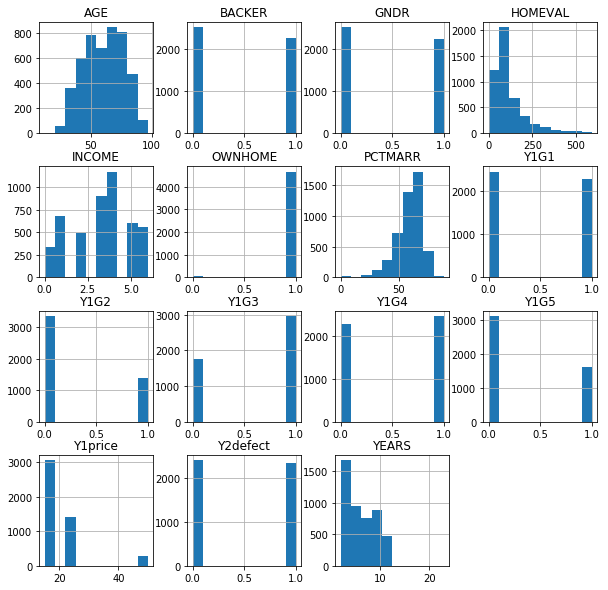

In [29]:
df.hist(figsize=(10,10))

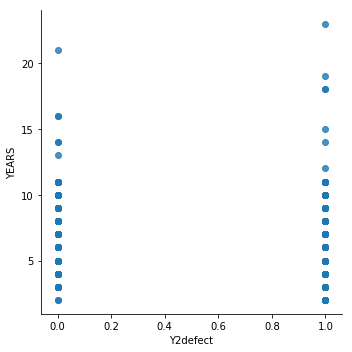

In [30]:
sns.lmplot('Y2defect', 'YEARS', data=df, fit_reg=False)

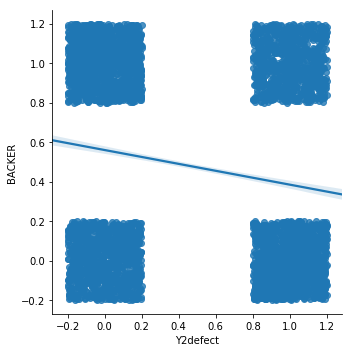

In [31]:
sns.lmplot("Y2defect", "BACKER", df, x_jitter=.2, y_jitter=.2)

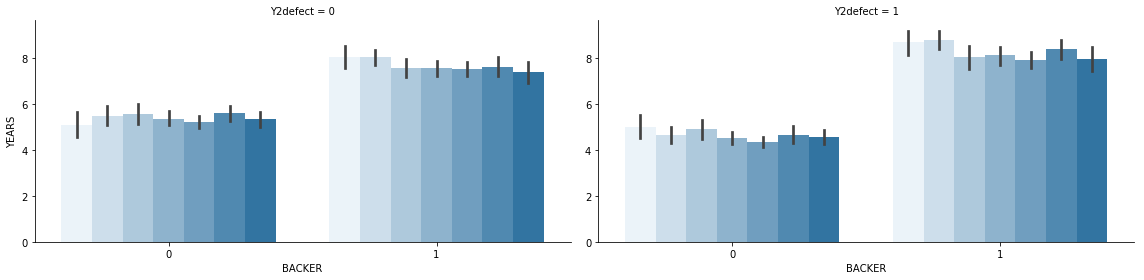

In [81]:
g = sns.FacetGrid(df, col= "Y2defect", size=4, aspect=2)
g.map(sns.barplot, 'BACKER', 'YEARS', 'INCOME')

# Exploratory data analysis

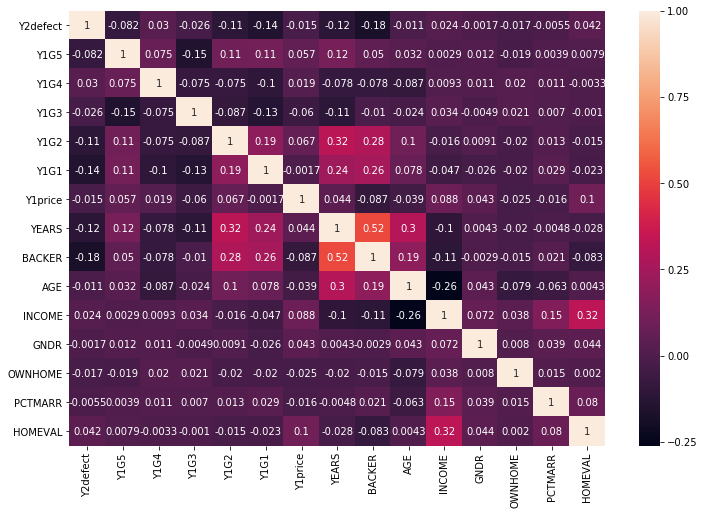

In [33]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

In [34]:
df.var()

Y2defect       0.250017
Y1G5           0.224721
Y1G4           0.249680
Y1G3           0.234113
Y1G2           0.205953
Y1G1           0.249727
Y1price       75.215656
YEARS          8.180330
BACKER         0.249329
AGE          259.529382
INCOME         3.071568
GNDR           0.249236
OWNHOME        0.015572
PCTMARR      136.963923
HOMEVAL     8343.993335
dtype: float64

In [35]:
df.groupby('Y2defect').count()

,FAKEID,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,PCTMARR,HOMEVAL
Y2defect,,,,,,,,,,,,,,,
0,2399,2399,2399,2399,2399,2399,2399,2399,2399,2399,2399,2399,2399,2399,2399
1,2342,2342,2342,2342,2342,2342,2342,2342,2342,2342,2342,2342,2342,2342,2342


We can see that 2399 people have renew for year 2 while 2342 did not renew for the second year

In [36]:
df.groupby(['BACKER','Y2defect']).count()

FAKEID  Y1G5  Y1G4  Y1G3  Y1G2  Y1G1  Y1price  YEARS   AGE  \
BACKER Y2defect                                                               
0      0           1056  1056  1056  1056  1056  1056     1056   1056  1056   
       1           1442  1442  1442  1442  1442  1442     1442   1442  1442   
1      0           1343  1343  1343  1343  1343  1343     1343   1343  1343   
       1            900   900   900   900   900   900      900    900   900   

                 INCOME  GNDR  OWNHOME  PCTMARR  HOMEVAL  
BACKER Y2defect                                           
0      0           1056  1056     1056     1056     1056  
       1           1442  1442     1442     1442     1442  
1      0           1343  1343     1343     1343     1343  
       1            900   900      900      900      900

We can see that are in the backer club will more likely renew.

In [37]:
df.groupby(['YEARS','Y2defect']).count()

FAKEID  Y1G5  Y1G4  Y1G3  Y1G2  Y1G1  Y1price  BACKER  AGE  \
YEARS Y2defect                                                               
2     0              2     2     2     2     2     2        2       2    2   
      1            129   129   129   129   129   129      129     129  129   
3     0            375   375   375   375   375   375      375     375  375   
      1            598   598   598   598   598   598      598     598  598   
4     0            309   309   309   309   309   309      309     309  309   
      1            259   259   259   259   259   259      259     259  259   
5     0            244   244   244   244   244   244      244     244  244   
      1            193   193   193   193   193   193      193     193  193   
6     0            307   307   307   307   307   307      307     307  307   
      1            206   206   206   206   206   206      206     206  206   
7     0            253   253   253   253   253   253      253     253  253   
      1            214   214   214   214   214   214      214     214  214   
8     0            168   168   168   168   168   168      168     168  168   
      1            121   121   121   121   121   121      121     121  121   
9     0            255   255   255   255   255   255      255     255  255   
      1            200   200   200   200   200   200      200     200  200   
10    0            227   227   227   227   227   227      227     227  227   
      1            205   205   205   205   205   205      205     205  205   
11    0            253   253   253   253   253   253      253     253  253   
      1            210   210   210   210   210   210      210     210  210   
12    1              1     1     1     1     1     1        1       1    1   
13    0              1     1     1     1     1     1        1       1    1   
14    0              2     2     2     2     2     2        2       2    2   
      1              1     1     1     1     1     1        1       1    1   
15    1              1     1     1     1     1     1        1       1    1   
16    0              2     2     2     2     2     2        2       2    2   
18    1              2     2     2     2     2     2        2       2    2   
19    1              1     1     1     1     1     1        1       1    1   
21    0              1     1     1     1     1     1        1       1    1   
23    1              1     1     1     1     1     1        1       1    1   

                INCOME  GNDR  OWNHOME  PCTMARR  HOMEVAL  
YEARS Y2defect                                           
2     0              2     2        2        2        2  
      1            129   129      129      129      129  
3     0            375   375      375      375      375  
      1            598   598      598      598      598  
4     0            309   309      309      309      309  
      1            259   259      259      259      259  
5     0            244   244      244      244      244  
      1            193   193      193      193      193  
6     0            307   307      307      307      307  
      1            206   206      206      206      206  
7     0            253   253      253      253      253  
      1            214   214      214      214      214  
8     0            168   168      168      168      168  
      1            121   121      121      121      121  
9     0            255   255      255      255      255  
      1            200   200      200      200      200  
10    0            227   227      227      227      227  
      1            205   205      205      205      205  
11    0            253   253      253      253      253  
      1            210   210      210      210      210  
12    1              1     1        1        1        1  
13    0              1     1        1        1        1  
14    0              2     2        2        2        2  
      1              1     1        1        1        1  
15    1    

It looks like the longer the ticket holder, the more likely they will renew

In [38]:
df.groupby(['INCOME','Y2defect']).count()

FAKEID  Y1G5  Y1G4  Y1G3  Y1G2  Y1G1  Y1price  YEARS  BACKER  \
INCOME Y2defect                                                                 
0.0    0            172   172   172   172   172   172      172    172     172   
       1            166   166   166   166   166   166      166    166     166   
1.0    0            370   370   370   370   370   370      370    370     370   
       1            313   313   313   313   313   313      313    313     313   
2.0    0            254   254   254   254   254   254      254    254     254   
       1            239   239   239   239   239   239      239    239     239   
3.0    0            446   446   446   446   446   446      446    446     446   
       1            455   455   455   455   455   455      455    455     455   
4.0    0            587   587   587   587   587   587      587    587     587   
       1            583   583   583   583   583   583      583    583     583   
5.0    0            298   298   298   298   298   298      298    298     298   
       1            301   301   301   301   301   301      301    301     301   
6.0    0            272   272   272   272   272   272      272    272     272   
       1            285   285   285   285   285   285      285    285     285   

                 AGE  GNDR  OWNHOME  PCTMARR  HOMEVAL  
INCOME Y2defect                                        
0.0    0         172   172      172      172      172  
       1         166   166      166      166      166  
1.0    0         370   370      370      370      370  
       1         313   313      313      313      313  
2.0    0         254   254      254      254      254  
       1         239   239      239      239      239  
3.0    0         446   446      446      446      446  
       1         455   455      455      455      455  
4.0    0         587   587      587      587      587  
       1         583   583      583      583      583  
5.0    0         298   298      298      298      298  
       1         301   301      301      301      301  
6.0    0         272   272      272      272      272  
       1         285   285      285      285      285

In [39]:
from scipy import stats

In [40]:
renew = df[df['Y2defect'] == 0]['YEARS']
defect = df[df['Y2defect'] == 1]['YEARS']
stats.ttest_ind(renew, defect)

Ttest_indResult(statistic=8.1249458989345413, pvalue=5.6592982518967208e-16)

In [41]:
two_sample = stats.ttest_ind(renew, defect)
print "The t-statistic is %.3f and the p-value is %.3f." % two_sample

The t-statistic is 8.125 and the p-value is 0.000.


The pvalue is low, so number of years does make a difference.

In [42]:
renew1 = df[df['Y2defect'] == 0]['BACKER']
defect1 = df[df['Y2defect'] == 1]['BACKER']
stats.ttest_ind(renew1, defect1)

Ttest_indResult(statistic=12.291539630104372, pvalue=3.3217580432089609e-34)

In [43]:
two_sample = stats.ttest_ind(renew1, defect1)
print "The t-statistic is %.3f and the p-value is %.3f." % two_sample

The t-statistic is 12.292 and the p-value is 0.000.


pvalue is low, so being in a backer club does make a difference for who will renew there ticket.

In [44]:
renew2 = df[df['Y2defect'] == 0]['INCOME']
defect2 = df[df['Y2defect'] == 1]['INCOME']
stats.ttest_ind(renew2, defect2)

Ttest_indResult(statistic=-1.6745195367413164, pvalue=0.094094521630529435)

In [45]:
two_sample = stats.ttest_ind(renew2, defect2)
print "The t-statistic is %.3f and the p-value is %.3f." % two_sample

The t-statistic is -1.675 and the p-value is 0.094.


Assuming we are going with alpha .01, income does not make a difference.

# Model Development

In [46]:
y = df['Y2defect']
X = df[['BACKER', 'YEARS', 'INCOME']]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Decision Tree

In [48]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [49]:
print metrics.accuracy_score(y_test, dt.predict(X_test))
print metrics.confusion_matrix(y_test, dt.predict(X_test))
print metrics.classification_report(y_test, dt.predict(X_test))
print metrics.roc_auc_score(y_test, dt.predict(X_test))

0.60435699227
[[469 247]
 [316 391]]
             precision    recall  f1-score   support

          0       0.60      0.66      0.62       716
          1       0.61      0.55      0.58       707

avg / total       0.61      0.60      0.60      1423

0.604034475674


# KNN

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [51]:
print metrics.accuracy_score(y_test, knn.predict(X_test))
print metrics.confusion_matrix(y_test, knn.predict(X_test))
print metrics.classification_report(y_test, knn.predict(X_test))
print metrics.roc_auc_score(y_test, knn.predict(X_test))

0.56711173577
[[425 291]
 [325 382]]
             precision    recall  f1-score   support

          0       0.57      0.59      0.58       716
          1       0.57      0.54      0.55       707

avg / total       0.57      0.57      0.57      1423

0.566943296484


# Logistic Regression

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [53]:
print metrics.accuracy_score(y_test, lr.predict(X_test))
print metrics.confusion_matrix(y_test, lr.predict(X_test))
print metrics.classification_report(y_test, lr.predict(X_test))
print metrics.roc_auc_score(y_test, lr.predict(X_test))

0.596626844694
[[404 312]
 [262 445]]
             precision    recall  f1-score   support

          0       0.61      0.56      0.58       716
          1       0.59      0.63      0.61       707

avg / total       0.60      0.60      0.60      1423

0.596832947461


# Feature Selection Decision Tree

In [54]:
X2 = df[['YEARS', 'BACKER', 'AGE', 'INCOME', 'GNDR', 'OWNHOME', 'PCTMARR', 'HOMEVAL']]

In [55]:
X_new = SelectKBest(chi2, k=3).fit_transform(X2, y)
print X_new

[[   8.    1.  203.]
 [  11.    1.   38.]
 [   4.    0.   68.]
 ..., 
 [   3.    0.   96.]
 [   6.    0.   95.]
 [   7.    1.   37.]]


In [56]:
selector = SelectKBest(chi2, k=3).fit(X2, y)
idxs_selected = selector.get_support(indices=True)
print idxs_selected
# Years, Backer, and Homeval is the important selection.

[0 1 7]


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)
dt2 = tree.DecisionTreeClassifier()
dt2.fit(X_train, y_train)

#Model evaluation
print metrics.accuracy_score(y_test, dt2.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt2.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, dt2.predict(X_test))
print "--------------------------------------------------------"
print metrics.roc_auc_score(y_test, dt2.predict(X_test))

0.541813070977
--------------------------------------------------------
[[429 287]
 [365 342]]
--------------------------------------------------------
             precision    recall  f1-score   support

          0       0.54      0.60      0.57       716
          1       0.54      0.48      0.51       707

avg / total       0.54      0.54      0.54      1423

--------------------------------------------------------
0.541448049434


# Feature Selection Logistic Regression

In [58]:
model = LogisticRegression()
rfe = RFE(model, 3) #best attributs
rfe = rfe.fit(X2, y)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[ True  True False False False  True False False]
[1 1 4 3 2 1 6 5]


In [59]:
# Features sorted by their rank
pd.DataFrame({'feature':X2.columns, 'importance':rfe.ranking_})

,feature,importance
0,YEARS,1
1,BACKER,1
2,AGE,4
3,INCOME,3
4,GNDR,2
5,OWNHOME,1
6,PCTMARR,6
7,HOMEVAL,5


In [60]:
#select the best 3
X_logistic = df[['YEARS', 'BACKER', 'OWNHOME']]
print X_logistic.head()

   YEARS  BACKER  OWNHOME
0      8       1      1.0
2     11       1      1.0
3      4       0      1.0
4      5       0      1.0
7      6       1      1.0


In [61]:
X2_train, X2_test, y_train, y_test = train_test_split(X_logistic, y, test_size=0.3, random_state=0)
lr2 = LogisticRegression()
lr2.fit(X_train, y_train)

#Model evaluation
print metrics.accuracy_score(y_test, lr2.predict(X2_test))
print metrics.confusion_matrix(y_test, lr2.predict(X2_test))
print metrics.classification_report(y_test, lr2.predict(X2_test))
print metrics.roc_auc_score(y_test, lr2.predict(X2_test))

0.596626844694
[[404 312]
 [262 445]]
             precision    recall  f1-score   support

          0       0.61      0.56      0.58       716
          1       0.59      0.63      0.61       707

avg / total       0.60      0.60      0.60      1423

0.596832947461


It seems like Decision Tree is the best model with a score of 60.4%

## Model Deployment & Prepare Entry Data

In [62]:
df2 = pd.read_excel("data/validation_dataset.xlsx")
df2.head()

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580D24RR,NaN,0,0,1,1,0,15,5,0,49.0,4,NaN,0,1,0.0,,66,64
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,84.0,5,,0,,0.0,,67,128
2,050Z45TB,NaN,1,0,1,1,0,15,5,1,NaN,,NaN,0,0,NaN,1,52,113
3,399V18KY,NaN,0,0,1,1,0,15,1,0,34.0,4,1,0,1,NaN,,65,81
4,009A52KP,NaN,0,1,0,1,0,25,9,1,59.0,4,NaN,1,1,0.0,,65,110


In [63]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9542 entries, 0 to 9541
Data columns (total 19 columns):
FAKEID      9542 non-null object
Y3defect    0 non-null float64
Y2G5        9542 non-null int64
Y2G4        9542 non-null int64
Y2G3        9542 non-null int64
Y2G2        9542 non-null int64
Y2G1        9542 non-null int64
Y2price     9542 non-null int64
YEARS       9542 non-null int64
BACKER      9542 non-null int64
AGE         7055 non-null float64
INCOME      9542 non-null object
CHILD       4810 non-null object
GNDR        9542 non-null object
OWNHOME     9542 non-null object
SPORT       4180 non-null float64
COMP        9542 non-null object
PCTMARR     9542 non-null int64
HOMEVAL     9542 non-null int64
dtypes: float64(3), int64(10), object(6)
memory usage: 1.4+ MB


In [64]:
df2 = df2.replace(r'\s+', np.nan, regex=True)
df2.head(10)

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580D24RR,NaN,0,0,1,1,0,15,5,0,49.0,4.0,NaN,0.0,1.0,0.0,NaN,66,64
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,84.0,5.0,NaN,0.0,NaN,0.0,NaN,67,128
2,050Z45TB,NaN,1,0,1,1,0,15,5,1,NaN,NaN,NaN,0.0,0.0,NaN,1.0,52,113
3,399V18KY,NaN,0,0,1,1,0,15,1,0,34.0,4.0,1.0,0.0,1.0,NaN,NaN,65,81
4,009A52KP,NaN,0,1,0,1,0,25,9,1,59.0,4.0,NaN,1.0,1.0,0.0,NaN,65,110
5,059D43VJ,NaN,0,0,0,0,1,15,1,0,69.0,6.0,NaN,0.0,1.0,0.0,NaN,69,192
6,874Y07FS,NaN,1,0,1,1,0,50,11,1,72.0,1.0,NaN,1.0,1.0,0.0,NaN,56,55
7,789T58LZ,NaN,0,1,1,0,0,15,3,0,64.0,3.0,1.0,1.0,1.0,NaN,1.0,58,319
8,958H17RR,NaN,0,0,0,1,1,25,6,0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,53,57
9,309O88WT,NaN,0,1,0,1,1,15,8,1,66.0,2.0,NaN,0.0,0.0,NaN,NaN,77,79


In [65]:
df2.isnull().sum()

FAKEID         0
Y3defect    9542
Y2G5           0
Y2G4           0
Y2G3           0
Y2G2           0
Y2G1           0
Y2price        0
YEARS          0
BACKER         0
AGE         2487
INCOME      2415
CHILD       8941
GNDR         565
OWNHOME     1952
SPORT       5362
COMP        8586
PCTMARR        0
HOMEVAL        0
dtype: int64

In [66]:
df2 = df2.drop(['CHILD', 'COMP', 'SPORT'], axis=1)
df2.head(10)

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,PCTMARR,HOMEVAL
0,580D24RR,NaN,0,0,1,1,0,15,5,0,49.0,4.0,0.0,1.0,66,64
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,84.0,5.0,0.0,NaN,67,128
2,050Z45TB,NaN,1,0,1,1,0,15,5,1,NaN,NaN,0.0,0.0,52,113
3,399V18KY,NaN,0,0,1,1,0,15,1,0,34.0,4.0,0.0,1.0,65,81
4,009A52KP,NaN,0,1,0,1,0,25,9,1,59.0,4.0,1.0,1.0,65,110
5,059D43VJ,NaN,0,0,0,0,1,15,1,0,69.0,6.0,0.0,1.0,69,192
6,874Y07FS,NaN,1,0,1,1,0,50,11,1,72.0,1.0,1.0,1.0,56,55
7,789T58LZ,NaN,0,1,1,0,0,15,3,0,64.0,3.0,1.0,1.0,58,319
8,958H17RR,NaN,0,0,0,1,1,25,6,0,NaN,NaN,0.0,0.0,53,57
9,309O88WT,NaN,0,1,0,1,1,15,8,1,66.0,2.0,0.0,0.0,77,79


In [67]:
df2.isnull().sum()

FAKEID         0
Y3defect    9542
Y2G5           0
Y2G4           0
Y2G3           0
Y2G2           0
Y2G1           0
Y2price        0
YEARS          0
BACKER         0
AGE         2487
INCOME      2415
GNDR         565
OWNHOME     1952
PCTMARR        0
HOMEVAL        0
dtype: int64

In [68]:
df2 = df2.dropna(subset = ['INCOME', 'OWNHOME', 'GNDR', 'AGE'])

In [69]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4611 entries, 0 to 9540
Data columns (total 16 columns):
FAKEID      4611 non-null object
Y3defect    0 non-null float64
Y2G5        4611 non-null int64
Y2G4        4611 non-null int64
Y2G3        4611 non-null int64
Y2G2        4611 non-null int64
Y2G1        4611 non-null int64
Y2price     4611 non-null int64
YEARS       4611 non-null int64
BACKER      4611 non-null int64
AGE         4611 non-null float64
INCOME      4611 non-null float64
GNDR        4611 non-null float64
OWNHOME     4611 non-null float64
PCTMARR     4611 non-null int64
HOMEVAL     4611 non-null int64
dtypes: float64(5), int64(10), object(1)
memory usage: 612.4+ KB


In [70]:
validation = df2[['BACKER', 'YEARS', 'INCOME']]
validation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4611 entries, 0 to 9540
Data columns (total 3 columns):
BACKER    4611 non-null int64
YEARS     4611 non-null int64
INCOME    4611 non-null float64
dtypes: float64(1), int64(2)
memory usage: 144.1 KB


I decided to do the same thing for the validation data set as I did for the data set.

In [71]:
fakeid = pd.DataFrame(df2['FAKEID'])
fakeid.head()
#Created a FakeID column

,FAKEID
0,580D24RR
3,399V18KY
4,009A52KP
5,059D43VJ
6,874Y07FS


In [72]:
# applying the decision tree model to validation dataset
output_scoring = dt.predict(validation)

# generating probability for defect for each fan
probs = dt.predict_proba(validation)
probs = pd.DataFrame(probs, columns=['prob of Renewal', 'prob of Defect'])

# joining two dataframes (fakeid and probability)
risky_fans = fakeid.join(probs)

# joining dataframes (fakeid, probability, and prediction)
predicted_y= pd.DataFrame(output_scoring, columns=['Predicted Defect'])
risky_fans = risky_fans.join(predicted_y)

# generating submission file
risky_fans.to_csv("data/submissionentry.csv", index=False)

In [73]:
output_scoring

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

# StoryTelling

We can see that we should focus on looking ticket holder who are in the backer club because they will likely renew there ticket. Another one is number of years they have been a ticket holder. They will likely renew there ticket just because they probably a loyal fan. We should be looking at this two data to help with who to contact if they are planning to renew.